You will compare the performance of two classifiers: a CNN (one student) and a
MLP (another student) with at least one hidden layer, trained with backpropagation. You
will have to decide the network architecture (#PEs, # of layers, etc.), learning rates, and
how to stop training. The results should be presented in a confusion matrix. Each
architecture should have two different implementations, either by changing the search
procedure (conjugate gradient or Levenberg-Marquadt instead of back-propagation) or
modifying the architecture (number of layers, RBF nonlinarities, or including batch
normalization or pooling) or different cost function (MSE or cross entropy). 

I want to see in writing a strategy to handle the selection of the hyper parameters
and the reasoning behind it. Comparison between the CNN and MLP is necessary and it
should address the weak points and strong points of each implementation. I want also to
see numerical evidence (plots/tables) that corroborate hyperparameters choices based on
performance. Please provide evidence that learning is stopped at the best point to
optimize generalization. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
plt.style.use('bmh')
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from IPython.display import clear_output

In [2]:
data = fetch_openml('Kuzushiji-MNIST')

In [3]:
X, t = data.data.to_numpy(), data.target.to_numpy()
t = t.astype(np.uint8)

In [4]:
X_train, X_test, t_train, t_test = X[:60000], X[60000:], t[:60000], t[60000:]
X_train, X_val, t_train, t_val = train_test_split(X_train, t_train, 
                                                  test_size = 0.20,
                                                  stratify = t_train)

In [5]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [6]:
learning_rate = 0.001
beta_1 = 0.9
beta_2 = 0.999
patience = 40

optimizer = keras.optimizers.Nadam(learning_rate = learning_rate, 
                                   beta_1 = beta_1, beta_2 = beta_2)

callback = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                         patience = patience,
                                         restore_best_weights = True)

In [7]:
epochs = 40
batch_size = 256
N1_vals = [32, 64, 96, 128, 160]
activation = 'sigmoid'

learning_curves = np.zeros((4, len(N1_vals), epochs))
test_performance = np.zeros((len(N1_vals), 2))

for N1_idx, N1 in np.ndenumerate(N1_vals):
    print('Training NN of size:', N1)

    model = keras.models.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(N1, activation = activation),
        keras.layers.Dense(10, activation = activation)
    ])
    
    model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])
    
    history = model.fit(X_train, t_train, epochs = epochs,
                        batch_size = batch_size,
                        validation_data = (X_val, t_val),
                        callbacks = [callback])
    
    learning_curves[0, N1_idx, :] = history.history['loss']
    learning_curves[1, N1_idx, :] = history.history['val_loss']
    learning_curves[2, N1_idx, :] = history.history['accuracy']
    learning_curves[3, N1_idx, :] = history.history['val_accuracy']
    
    test_performance[N1_idx, :] = model.evaluate(X_test, t_test)
    
    clear_output()

In [8]:
np.where(test_performance[:,1] == np.max(test_performance[:,1]))

(array([4]),)

In [9]:
np.max(test_performance)

0.885200023651123

In [10]:
epochs = 40
batch_size = 256
N1_vals = [32, 64, 96, 128]
N2_vals = [32, 64, 96, 128]
activation = 'sigmoid'

learning_curves = np.zeros((4, len(N1_vals), len(N2_vals), epochs))
test_performance = np.zeros((len(N1_vals), len(N2_vals), 2))

for N1_idx, N1 in np.ndenumerate(N1_vals):
    for N2_idx, N2 in np.ndenumerate(N2_vals):
        print('Training NN of size:', (N1, N2))

        model = keras.models.Sequential([
            keras.layers.Input(shape=(784,)),
            keras.layers.Dense(N1, activation = activation),
            keras.layers.Dense(N2, activation = activation),
            keras.layers.Dense(10, activation = activation)
        ])

        model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                 metrics = ['accuracy'])

        history = model.fit(X_train, t_train, epochs = epochs,
                            batch_size = batch_size,
                            validation_data = (X_val, t_val),
                            callbacks = [callback])

        learning_curves[0, N1_idx, N2_idx, :] = history.history['loss']
        learning_curves[1, N1_idx, N2_idx, :] = history.history['val_loss']
        learning_curves[2, N1_idx, N2_idx, :] = history.history['accuracy']
        learning_curves[3, N1_idx, N2_idx, :] = history.history['val_accuracy']
        
        test_performance[N1_idx, N2_idx, :] = model.evaluate(X_test, t_test)

        clear_output()

In [11]:
np.where(test_performance[:,:,1] == np.max(test_performance))

(array([3]), array([3]))

In [12]:
np.max(test_performance)

0.8834999799728394

In [13]:
epochs = 40
batch_size = 256
N1_vals = [32, 64, 96, 128]
N2_vals = [32, 64, 96, 128]
N3_vals = [32, 64, 96, 128]
activation = 'sigmoid'

learning_curves = np.zeros((4, len(N1_vals), len(N2_vals), len(N3_vals), epochs))
test_performance = np.zeros((len(N1_vals), len(N2_vals), len(N3_vals), 2))

for N1_idx, N1 in np.ndenumerate(N1_vals):
    for N2_idx, N2 in np.ndenumerate(N2_vals):
        for N3_idx, N3 in np.ndenumerate(N3_vals):
            print('Training NN of size:', (N1, N2, N3))

            model = keras.models.Sequential([
                keras.layers.Input(shape=(784,)),
                keras.layers.Dense(N1, activation = activation),
                keras.layers.Dense(N2, activation = activation),
                keras.layers.Dense(N3, activation = activation), 
                keras.layers.Dense(10, activation = activation)
            ])

            model.compile(loss = 'sparse_categorical_crossentropy',
                     optimizer = optimizer,
                     metrics = ['accuracy'])

            history = model.fit(X_train, t_train, epochs = epochs,
                                batch_size = batch_size,
                                validation_data = (X_val, t_val),
                                callbacks = [callback])

            learning_curves[0, N1_idx, N2_idx, N3_idx, :] = history.history['loss']
            learning_curves[1, N1_idx, N2_idx, N3_idx, :] = history.history['val_loss']
            learning_curves[2, N1_idx, N2_idx, N3_idx, :] = history.history['accuracy']
            learning_curves[3, N1_idx, N2_idx, N3_idx, :] = history.history['val_accuracy']

            test_performance[N1_idx, N2_idx, N3_idx, :] = model.evaluate(X_test, t_test)

            clear_output()

In [14]:
np.max(test_performance[:,:,:,1])

0.8794000148773193

In [15]:
np.where(test_performance[:,:,:,1] == np.max(test_performance[:,:,:,1]))

(array([3]), array([3]), array([0]))

In [16]:
epochs = 40
batch_size = 256
N1_vals = [160, 192, 224, 256]
activation = 'sigmoid'

learning_curves = np.zeros((4, len(N1_vals), epochs))
test_performance = np.zeros((len(N1_vals), 2))

for N1_idx, N1 in np.ndenumerate(N1_vals):
    print('Training NN of size:', N1)

    model = keras.models.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(N1, activation = activation),
        keras.layers.Dense(10, activation = activation)
    ])
    
    model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])
    
    history = model.fit(X_train, t_train, epochs = epochs,
                        batch_size = batch_size,
                        validation_data = (X_val, t_val),
                        callbacks = [callback])
    
    learning_curves[0, N1_idx, :] = history.history['loss']
    learning_curves[1, N1_idx, :] = history.history['val_loss']
    learning_curves[2, N1_idx, :] = history.history['accuracy']
    learning_curves[3, N1_idx, :] = history.history['val_accuracy']
    
    test_performance[N1_idx, :] = model.evaluate(X_test, t_test)
    
    clear_output()

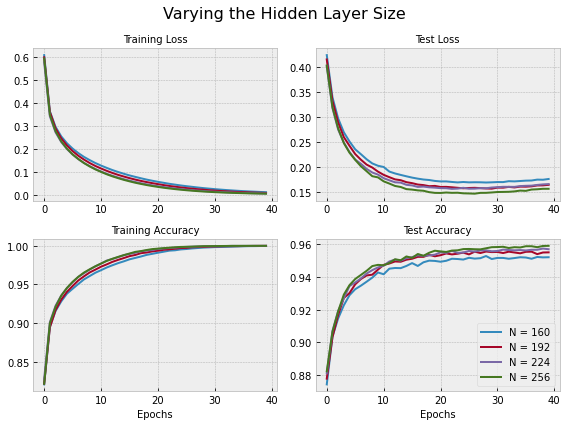

In [17]:
titles = ['Training Loss', 'Test Loss', 'Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8,6))
for i in np.arange(len(learning_curves)):
    plt.subplot(2,2,i+1)
    for j in np.arange(len(N1_vals)):
        plt.plot(learning_curves[i, j, :], label='N = '+str(N1_vals[j]))
        plt.title(titles[i], fontsize=10)
        if i > 1:
            plt.xlabel('Epochs', fontsize=10)
plt.suptitle('Varying the Hidden Layer Size', fontsize=16)
plt.tight_layout()
plt.legend(loc='lower right')
plt.savefig('layer_size.png');

In [18]:
epochs = 40
batch_size = 256
N1 = 256
activation_fxns = ['sigmoid', 'tanh']

learning_curves = np.zeros((4, len(activation), epochs))
test_performance = np.zeros((len(activation), 2))

for idx, activation in np.ndenumerate(activation_fxns):

    model = keras.models.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(N1, activation = activation),
        keras.layers.Dense(10, activation = activation)
    ])
    
    model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])
    
    history = model.fit(X_train, t_train, epochs = epochs,
                        batch_size = batch_size,
                        validation_data = (X_val, t_val),
                        callbacks = [callback])
    
    learning_curves[0, idx, :] = history.history['loss']
    learning_curves[1, idx, :] = history.history['val_loss']
    learning_curves[2, idx, :] = history.history['accuracy']
    learning_curves[3, idx, :] = history.history['val_accuracy']
    
    test_performance[idx, :] = model.evaluate(X_test, t_test)
    
    clear_output()

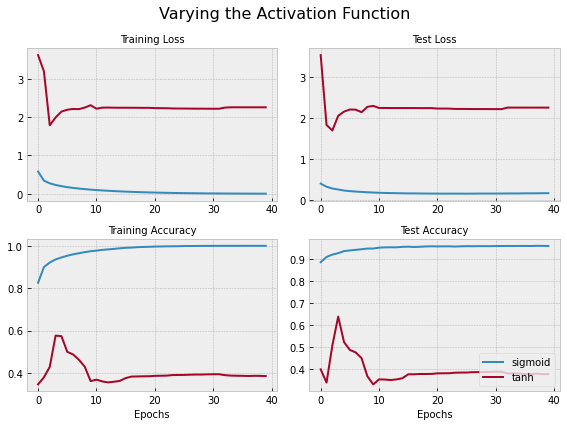

In [19]:
titles = ['Training Loss', 'Test Loss', 'Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8,6))
for i in np.arange(len(learning_curves)):
    plt.subplot(2,2,i+1)
    for j in np.arange(len(activation_fxns)):
        plt.plot(learning_curves[i, j, :], label=activation_fxns[j])
        plt.title(titles[i], fontsize=10)
        if i > 1:
            plt.xlabel('Epochs', fontsize=10)
plt.suptitle('Varying the Activation Function', fontsize=16)
plt.tight_layout()
plt.legend(loc='lower right')
plt.savefig('tanh.png');

In [20]:
model = keras.models.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(N1, activation = 'sigmoid'),
        keras.layers.Dense(10, activation = 'softmax')
    ])
    
model.compile(loss = 'sparse_categorical_crossentropy',
         optimizer = optimizer,
         metrics = ['accuracy'])

history = model.fit(X_train, t_train, epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (X_val, t_val),
                    callbacks = [callback])

learning_curves[0, idx, :] = history.history['loss']
learning_curves[1, idx, :] = history.history['val_loss']
learning_curves[2, idx, :] = history.history['accuracy']
learning_curves[3, idx, :] = history.history['val_accuracy']

test_performance[idx, :] = model.evaluate(X_test, t_test)

clear_output()

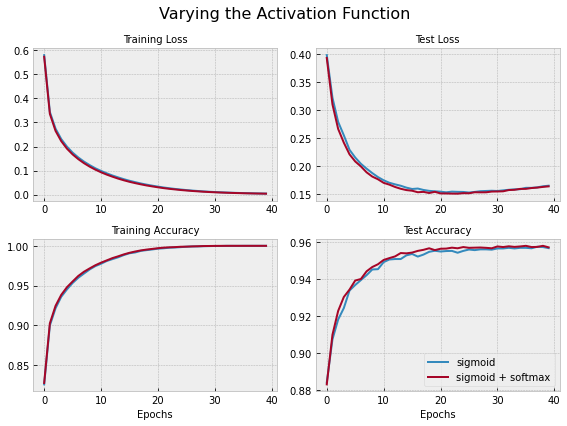

In [21]:
activation_fxns = ['sigmoid', 'sigmoid + softmax']
titles = ['Training Loss', 'Test Loss', 'Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8,6))
for i in np.arange(len(learning_curves)):
    plt.subplot(2,2,i+1)
    for j in np.arange(len(activation_fxns)):
        plt.plot(learning_curves[i, j, :], label=activation_fxns[j])
        plt.title(titles[i], fontsize=10)
        if i > 1:
            plt.xlabel('Epochs', fontsize=10)
plt.suptitle('Varying the Activation Function', fontsize=16)
plt.tight_layout()
plt.legend(loc='lower right')
plt.savefig('softmax.png');

In [22]:
epochs = 100
patience = 10
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                         patience = patience,
                                         restore_best_weights = True)

model = keras.models.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(256, activation = 'sigmoid'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

model.compile(loss = 'sparse_categorical_crossentropy',
         optimizer = optimizer,
         metrics = ['accuracy'])

history = model.fit(X_train, t_train, epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (X_val, t_val),
                    callbacks = [callback])

clear_output()

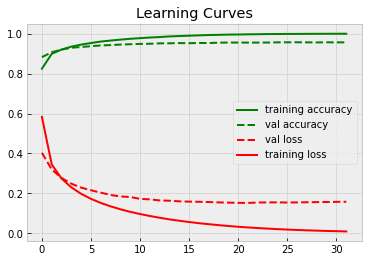

In [23]:
plt.plot(history.history['accuracy'], label='training accuracy', c='g')
plt.plot(history.history['val_accuracy'], label='val accuracy', ls='--', c='g')
plt.plot(history.history['val_loss'], label='val loss', ls='--', c='r')
plt.plot(history.history['loss'], label='training loss', c='r')
plt.legend()
plt.title('Learning Curves');

In [24]:
y_proba_train = model.predict(X_train)
y_proba_test = model.predict(X_test)
y_train = np.argmax(y_proba_train, axis=1)
y_test = np.argmax(y_proba_test, axis=1)

1500/1500 [==============================] - 1s 779us/step - loss: 0.0249 - accuracy: 0.9980


[0.024877626448869705, 0.9980416893959045]

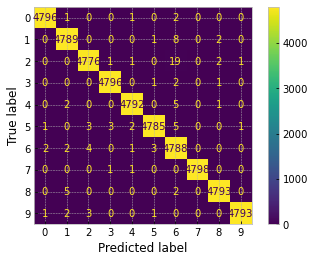

In [25]:
conf_mx = confusion_matrix(t_train, y_train)
disp_cm = ConfusionMatrixDisplay(conf_mx, display_labels = range(10))
disp_cm.plot()
plt.savefig('cm_SCC_train.png');
model.evaluate(X_train, t_train)

313/313 [==============================] - 0s 633us/step - loss: 0.3795 - accuracy: 0.8952


[0.3795478940010071, 0.8952000141143799]

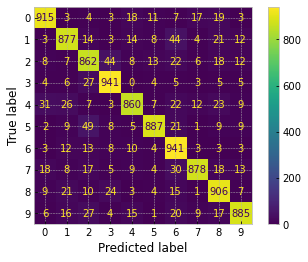

In [26]:
conf_mx = confusion_matrix(t_test, y_test)
disp_cm = ConfusionMatrixDisplay(conf_mx, display_labels = range(10))
disp_cm.plot()
plt.savefig('cm_SCC_test.png');
model.evaluate(X_test, t_test)

In [27]:
enc = OneHotEncoder()

t_train = enc.fit_transform(t_train.reshape(-1,1)).toarray()
t_val = enc.transform(t_val.reshape(-1,1)).toarray()
t_test = enc.transform(t_test.reshape(-1,1)).toarray()

NameError: name 'OneHotEncoder' is not defined

In [ ]:
epochs = 100
patience = 10
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                         patience = patience,
                                         restore_best_weights = True)

model = keras.models.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(256, activation = 'sigmoid'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

model.compile(loss = 'mean_squared_error',
         optimizer = optimizer,
         metrics = ['accuracy'])

history = model.fit(X_train, t_train, epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (X_val, t_val),
                    callbacks = [callback])

clear_output()

In [ ]:
plt.plot(history.history['val_loss'], label='val loss', ls='--', c='r')
plt.plot(history.history['loss'], label='training loss', c='r')
plt.xlabel('Epochs')
plt.legend()
plt.title('Loss Curves');

In [ ]:
plt.plot(history.history['accuracy'], label='val loss', ls='--', c='r')
plt.plot(history.history['val_accuracy'], label='training loss', c='r')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy Curves');

In [ ]:
y_proba_train = model.predict(X_train)
y_proba_test = model.predict(X_test)
y_train = np.argmax(y_proba_train, axis=1)
y_test = np.argmax(y_proba_test, axis=1)

In [ ]:
conf_mx = confusion_matrix(np.argmax(t_train, axis=1), y_train)
disp_cm = ConfusionMatrixDisplay(conf_mx, display_labels = range(10))
disp_cm.plot()
plt.savefig('cm_MSE_train.png');
model.evaluate(X_train, t_train)

In [ ]:
conf_mx = confusion_matrix(np.argmax(t_test, axis=1), y_test)
disp_cm = ConfusionMatrixDisplay(conf_mx, display_labels = range(10))
disp_cm.plot()
plt.savefig('cm_MSE_test.png');
model.evaluate(X_test, t_test)